In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import preprocess
from datetime import datetime
import eda_process
import matplotlib.pyplot as plt

In [2]:
# 10만개 데이터 이용하여 EDA 진행
df = preprocess.makeDataFrameFromDataSet(1.5*(10**6))
df_test = df[10**5:]
df = df[:10**5]

# 시간 관련 피쳐 추가 및 타입 설정
df['Sale'] = df['Sale'].astype(float)

df['datetime'] = df['click_timestamp'].map(lambda x : datetime.fromtimestamp(x).strftime('%Y %m %d %H %M %S'))
df['weekday'] = df['click_timestamp'].map(lambda x : str(datetime.fromtimestamp(x).weekday()))
df[['year','month','day','hour','minute','second']] = pd.DataFrame(df.datetime.str.split(' ',6).tolist())
df[:10]

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,partner_id,user_id,datetime,weekday,year,month,day,hour,minute,second
0,0.0,-1.00,-1,1598891820,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,E3DDEB04F8AFF944B11943BB57D2F620,493CFB4A87C50804C94C0CF76ABD19CD,2020 09 01 01 37 00,1,2020,09,01,01,37,00
1,0.0,-1.00,-1,1598925284,0,0.00,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,-1,1B491180398E2F0390E6A588B3BCE291,...,BD01BAFAE73CF38C403978BBB458300C,D0EBCD4402172AE3AA6FD21FB77BDE84,2020 09 01 10 54 44,1,2020,09,01,10,54,44
2,0.0,-1.00,-1,1598892568,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,C4D189327BD87FEB3BF896DA716C6995,E8A8BEA257B19574C36108D0F0CDADE5,2020 09 01 01 49 28,1,2020,09,01,01,49,28
3,0.0,-1.00,-1,1598891174,-1,0.00,-1,D7D1FB49049702BF6338894757E0D959,B0E6BD3ACC0707BAB31CA2C2B08E652F,-1,...,440255DF62CFD36FBC0206828FC488E0,9703077BD18F430BD232A6F74931928E,2020 09 01 01 26 14,1,2020,09,01,01,26,14
4,0.0,-1.00,-1,1598905245,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,E3DDEB04F8AFF944B11943BB57D2F620,703B8CFC8D65A67BDF96595CCF992D27,2020 09 01 05 20 45,1,2020,09,01,05,20,45
5,1.0,89.90,442485,1598929598,9,49.95,0CD76C7030D0900BE250C8D41703D180,D7D1FB49049702BF6338894757E0D959,-1,A5D15FC386510762EC0DDFF54ABE6F94,...,743B1EE3A39E06D855A72B3B66D501D0,E94BA61ACE2488B7DA7920736B82DFBD,2020 09 01 12 06 38,1,2020,09,01,12,06,38
6,0.0,-1.00,-1,1598940008,-1,0.00,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,E3DDEB04F8AFF944B11943BB57D2F620,B361216FD8F17C7F748DFAC7EEA9C231,2020 09 01 15 00 08,1,2020,09,01,15,00,08
7,1.0,158.33,184,1598908235,-1,158.33,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,...,E3DDEB04F8AFF944B11943BB57D2F620,A00E7A8538C058366DA15181CC56FD99,2020 09 01 06 10 35,1,2020,09,01,06,10,35
8,0.0,-1.00,-1,1598933796,1,0.00,88460293E9517D21E39AA889BD5AADC8,7E56C27BFF0305E788DA55A029EC4988,-1,A5D15FC386510762EC0DDFF54ABE6F94,...,6E2A0A83CA3B44030C176D1439120336,0DBD9B05FDE6B4497D79261FA92EB213,2020 09 01 13 16 36,1,2020,09,01,13,16,36
9,0.0,-1.00,-1,1598900998,234,0.00,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,-1,A5D15FC386510762EC0DDFF54ABE6F94,...,F122B91F6D102E4630817566839A4F1F,B61713893FE936845E38AAD86760846B,2020 09 01 04 09 58,1,2020,09,01,04,09,58


# 탐색적 데이터 분석(EDA) 및 시각화

## 정답 label의 빈도 확인

In [3]:
df['Sale'].mean()

0.1076

## product_price 피쳐 분석 - Sale 과 product_price 종속성 확인

In [4]:
df[(df['Sale']==1) & (df['product_price']==0)]

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category3,product_category4,product_category5,product_category6,product_category7,product_country,product_id,product_title,partner_id,user_id
87,1,87.56,1923598,1598909291,133,0.0,-1,D7D1FB49049702BF6338894757E0D959,EABC1B636057917D23E7EBD3BB9909F7,-1,...,87E33E0563FFE783FB56D01E7E09E692,70C58E563C7EC0AB88634CB716AB1BAD,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,D06276D6D205606A47D3AB81EFFB1661,11C216AF41313CCF3A6659998CECBB4D 97222245ECD5E...,E3DDEB04F8AFF944B11943BB57D2F620,4F5240D76973A12A60AE34B4DBA8B53B
93,1,0.00,1151,1598888238,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,440255DF62CFD36FBC0206828FC488E0,47A7D10CC7DA2AA036E84BC615AF18A0
174,1,0.00,3397,1598896693,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,7A6AC28F0D1541BD0FD12CA924E729D1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,B926E8E57093C0E2867B170A37D45682,6A6F431D38AC8AF34F45D6FED3CAB184
202,1,0.00,221,1598918457,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,1A86196AD2AAE80454E590D7CA6F74EB,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,B926E8E57093C0E2867B170A37D45682,01714149EEDFA4E1D1D0F5B4DCAB5092
327,1,0.00,186419,1598890049,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,EA337E36B9683197FFD209D4C62D27A4,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,B926E8E57093C0E2867B170A37D45682,834F1C9A9DBB7A06773CC7F12053E43D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99325,1,0.00,616,1601339309,2,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,5E87F225770B46CCF654D6F6AC2A396B,-1,...,87E33E0563FFE783FB56D01E7E09E692,9A4E494AF922C95228B07939FF9F3318,B402CAD276ACD4D6133A2C67493F839D,-1,-1,57A1D462A03BD076E029CF9310C11FC5,F6A35FD5071607D683F3225A698C3E7B,335CE8082A1CD41805C2BFF2537E7270 FCD188A0E1F24...,E3DDEB04F8AFF944B11943BB57D2F620,FC33A5C5B9606FE85E52099904958E5A
99739,1,0.00,3349,1601348769,176,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,533011096573D68BFC0693224D985A3B,-1,...,2C1BF1FAB1CA7D1CDFCA0BAA5071AE24,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,713C460A920C43498A6A96DA4C63DC21,B1307FE5A41D1B598A37FA0A26B71DFE 5C14D93134E1C...,E3DDEB04F8AFF944B11943BB57D2F620,7B8FD987263A1B603D3A65A1490553FA
99828,1,0.00,241,1601326912,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,C61B247056B77AA906D188A27FE1FD8E,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,B926E8E57093C0E2867B170A37D45682,E697BDF08B7AE2EFC851764AFC42C60F
99865,1,0.00,9637,1601318634,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,D4516B6E3666F69EE930AF5037931D1A,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,440255DF62CFD36FBC0206828FC488E0,5CCE9B8DF679AAA1FEEABB3B08B4C38F


In [5]:
df[(df['Sale']==0) & (df['product_price']>0)]

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category3,product_category4,product_category5,product_category6,product_category7,product_country,product_id,product_title,partner_id,user_id


### 분석결과
- 총 150만개의 데이터 중 7890개 데이터를 제외하면
product_price 는 Sale 이 1인 경우 항상 0 이상 , 아닌경우 항상 0이다.
- 두 데이터의 종속성이 너무 높은 것으로 판단됨

## 범주형 데이터 확인

In [8]:
# 각 df 의 unique 값들의 수를 확인.
for column in df.columns :
    print(column,len(df[column].unique()))

Sale 2
SalesAmountInEuro 8101
time_delay_for_conversion 7376
click_timestamp 94477
nb_clicks_1week 1789
product_price 4007
product_age_group 10
device_type 5
audience_id 4333
product_gender 13
product_brand 8141
product_category1 22
product_category2 149
product_category3 769
product_category4 1018
product_category5 514
product_category6 106
product_category7 3
product_country 18
product_id 53638
product_title 36327
partner_id 277
user_id 99299
datetime 94477
weekday 7
year 1
month 4
day 16
hour 24
minute 60
second 60


In [7]:
# 범주형 데이터 데이터수 확인
from scipy.stats import mode

ohe_columns = ['device_type','product_gender','product_age_group','product_country']

for ohe_column in ohe_columns :

  display(df[ohe_column].value_counts())

  print()

  print(mode(df[ohe_column]))

7E56C27BFF0305E788DA55A029EC4988    54882
D7D1FB49049702BF6338894757E0D959    37229
FF2C446555E3822B0E0FC3406116E86D     7858
-1                                     19
B432A885981287B47E08B41E802860B2       12
Name: device_type, dtype: int64


ModeResult(mode=array(['7E56C27BFF0305E788DA55A029EC4988'], dtype=object), count=array([54882]))


-1                                  72643
A5D15FC386510762EC0DDFF54ABE6F94    13912
1B491180398E2F0390E6A588B3BCE291     8457
C45A9AC6D102ACAEEDF0D6F78636D84A     4090
D7B42B0C4D807EF1C13F79948743E9DA      532
6EFABCEDA36A931DBF760F88970BAF0E      136
86E2AFBF909EC95B069893FF0BBC5B26       82
C83584C67375245584CEBF5DCE5BEE2D       62
26FE89E9DD2E6FC18AA5BE1F6D5A6870       58
3B3F1EFC68D245B766D311E45CD6B955       19
28F311FA00BD3B4D076659D87EE3AE8D        5
D894202FD3ABAE0B55F9FAE133412DE5        2
0FB06F1EAC1E00A436B336C5DF3C14AF        2
Name: product_gender, dtype: int64


ModeResult(mode=array(['-1'], dtype=object), count=array([72643]))


-1                                  73128
4C90FD52FC53D2C1C205844CB69575AB    20577
88460293E9517D21E39AA889BD5AADC8     3047
921B36149E5B081FD24450BFE2CE4430     2019
0CD76C7030D0900BE250C8D41703D180      530
538912C31E773613AB51FBAE58492476      444
E7BD5A29457B8E92582951B586319A9C      114
F716A9DB9D084CD5CFBDA30A923016E1       80
D72D7E92251E4C54C786FDEFFA4DEF5A       35
3FEC071EF6B3D061D8804E0522FF4D2A       26
Name: product_age_group, dtype: int64


ModeResult(mode=array(['-1'], dtype=object), count=array([73128]))


57A1D462A03BD076E029CF9310C11FC5    27090
-1                                  23268
989EEF92F2A525DD896557425EA7C4C7    21206
2AC62132FBCFA093B9426894A4BC6278    13282
D963E3BCE149E71F5D5E3000DCF68A9F     7989
F47588BE654E207435633B072A9D69BC     4399
B1D897877EBD2BCE4A722DF0581CDAF5     1600
F0C08A161AA0404193A7EF78F5C3E06C      423
B74153C05E08C5657699F356BFDB2D85      305
2D272B47B9F6C9A9690C783C6ACA8E8D      172
A5B2C360D0724A75CDB046D64D30ACAD       74
706D09EEA6B6EA9A3DD3EAE236428B6B       73
D12ABFD80E8B026DA7D56377F588093B       55
1891ECB8C7C09755B33266AFD614660A       33
4A3E87E6152F02C52A014D0846726558       12
DE706337A6260D3C92FB07341E9C48A5        8
B8E45AC35500A8A97A62A57B9B8B3CC8        7
D8BAE0DF7EDB963C5F3A37A22311705A        4
Name: product_country, dtype: int64


ModeResult(mode=array(['57A1D462A03BD076E029CF9310C11FC5'], dtype=object), count=array([27090]))


## 정수형 데이터 확인

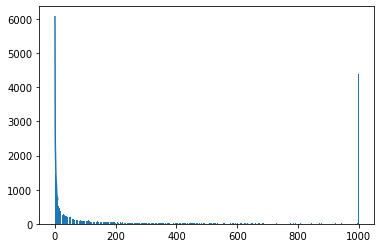

In [8]:
# Normalization 시각화
# nb_clicks_1week 분포 시각화

divide_num = 1
max_value = 1000

max_taken = max(df['nb_clicks_1week'])

cnt_involve = [0 for _ in range(-1,int(max_taken/divide_num)+1,1)]

for i in range(-1,len(df['nb_clicks_1week'])) :
    val = int(df['nb_clicks_1week'].iloc[i])
    if val>=max_value :
        val=max_value

    cnt_involve[ int(val/divide_num) ] += 1

cnt_involve
plt.bar([i for i in range(-1,max_value+1,1)] , cnt_involve[:max_value+2])
#plt.xticks([i for i in range(0,100,10)])
plt.plot(cnt_involve[:10])

## click_timestamp 확인

[]

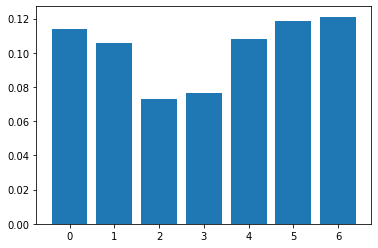

In [10]:
# 요일별 분석 : 주말 및 월요일에 sale 의 발생 확률이 높음
df['Sale'] = df['Sale'].astype(float)

# 요일별 Sale 비율 데이터 시각화 
# 토,일,월요일의 데이터가 비교적 값이 큼
list_group_by=df[['Sale','weekday']].groupby(['weekday']).mean().values
list_group_by = list(map(lambda x : x[0],list_group_by))
list_group_by

plt.bar( df[['Sale','weekday']].groupby(['weekday']).mean().index ,list_group_by)
plt.plot()

[]

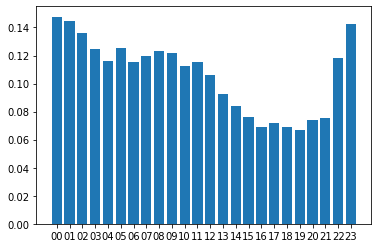

In [11]:
# 시간별 Sale 비율 데이터 시각화 
# 22~02시 까지의 데이터가 비교적 값이 큼
list_group_by=df[['Sale','hour',]].groupby(['hour']).mean().values
list_group_by = list(map(lambda x : x[0],list_group_by))
list_group_by

plt.bar( df[['Sale','hour']].groupby(['hour']).sum().index ,list_group_by)
plt.plot()

[]

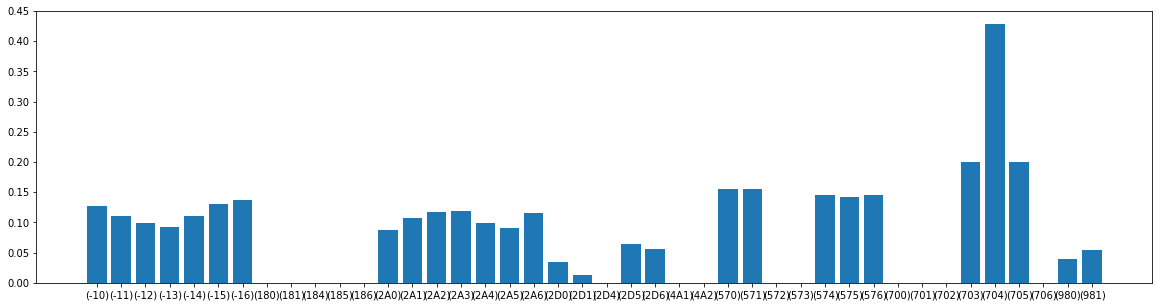

In [5]:
# country,weekday 별 Sale 비율 데이터 시각화
plt.figure(figsize=(20,5))
plt = eda_process.groupPloting(df,['product_country','weekday'],7*6)
plt.plot()

[]

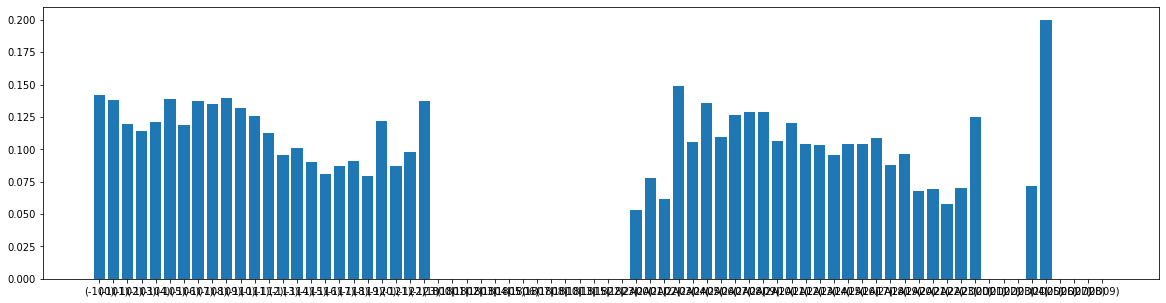

In [6]:
plt.figure(figsize=(20,5))
plt = eda_process.groupPloting(df,['product_country','hour'],24*3)
plt.plot()

[]

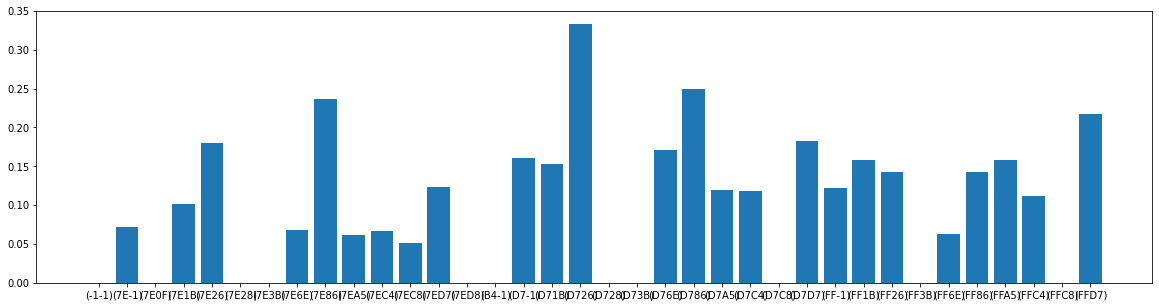

In [3]:
## product_gender , device_type 별 Sale 비율 확인
plt.figure(figsize=(20,5))
plt = eda_process.groupPloting(df,['device_type','product_gender'],13*4)
plt.plot()